In [60]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [61]:
pip install ucimlrepo

In [62]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushroom.data.features
y = mushroom.data.targets

# metadata
print(mushroom.metadata)

# variable information
print(mushroom.variables)


{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

In [63]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [64]:
y

,poisonous
0,p
1,e
2,e
3,p
4,e
...,...
8119,e
8120,e
8121,e
8122,p


In [65]:
#2.Perform Exploratory Data Analysis (EDA) on the dataset.
#creting 'df' dataframe concating X,y
df = pd.concat([X, y], axis=1)


In [66]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [67]:
df.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [69]:
#missing value exist?
df.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
poisonous                      0
dtype: int64

<Axes: >

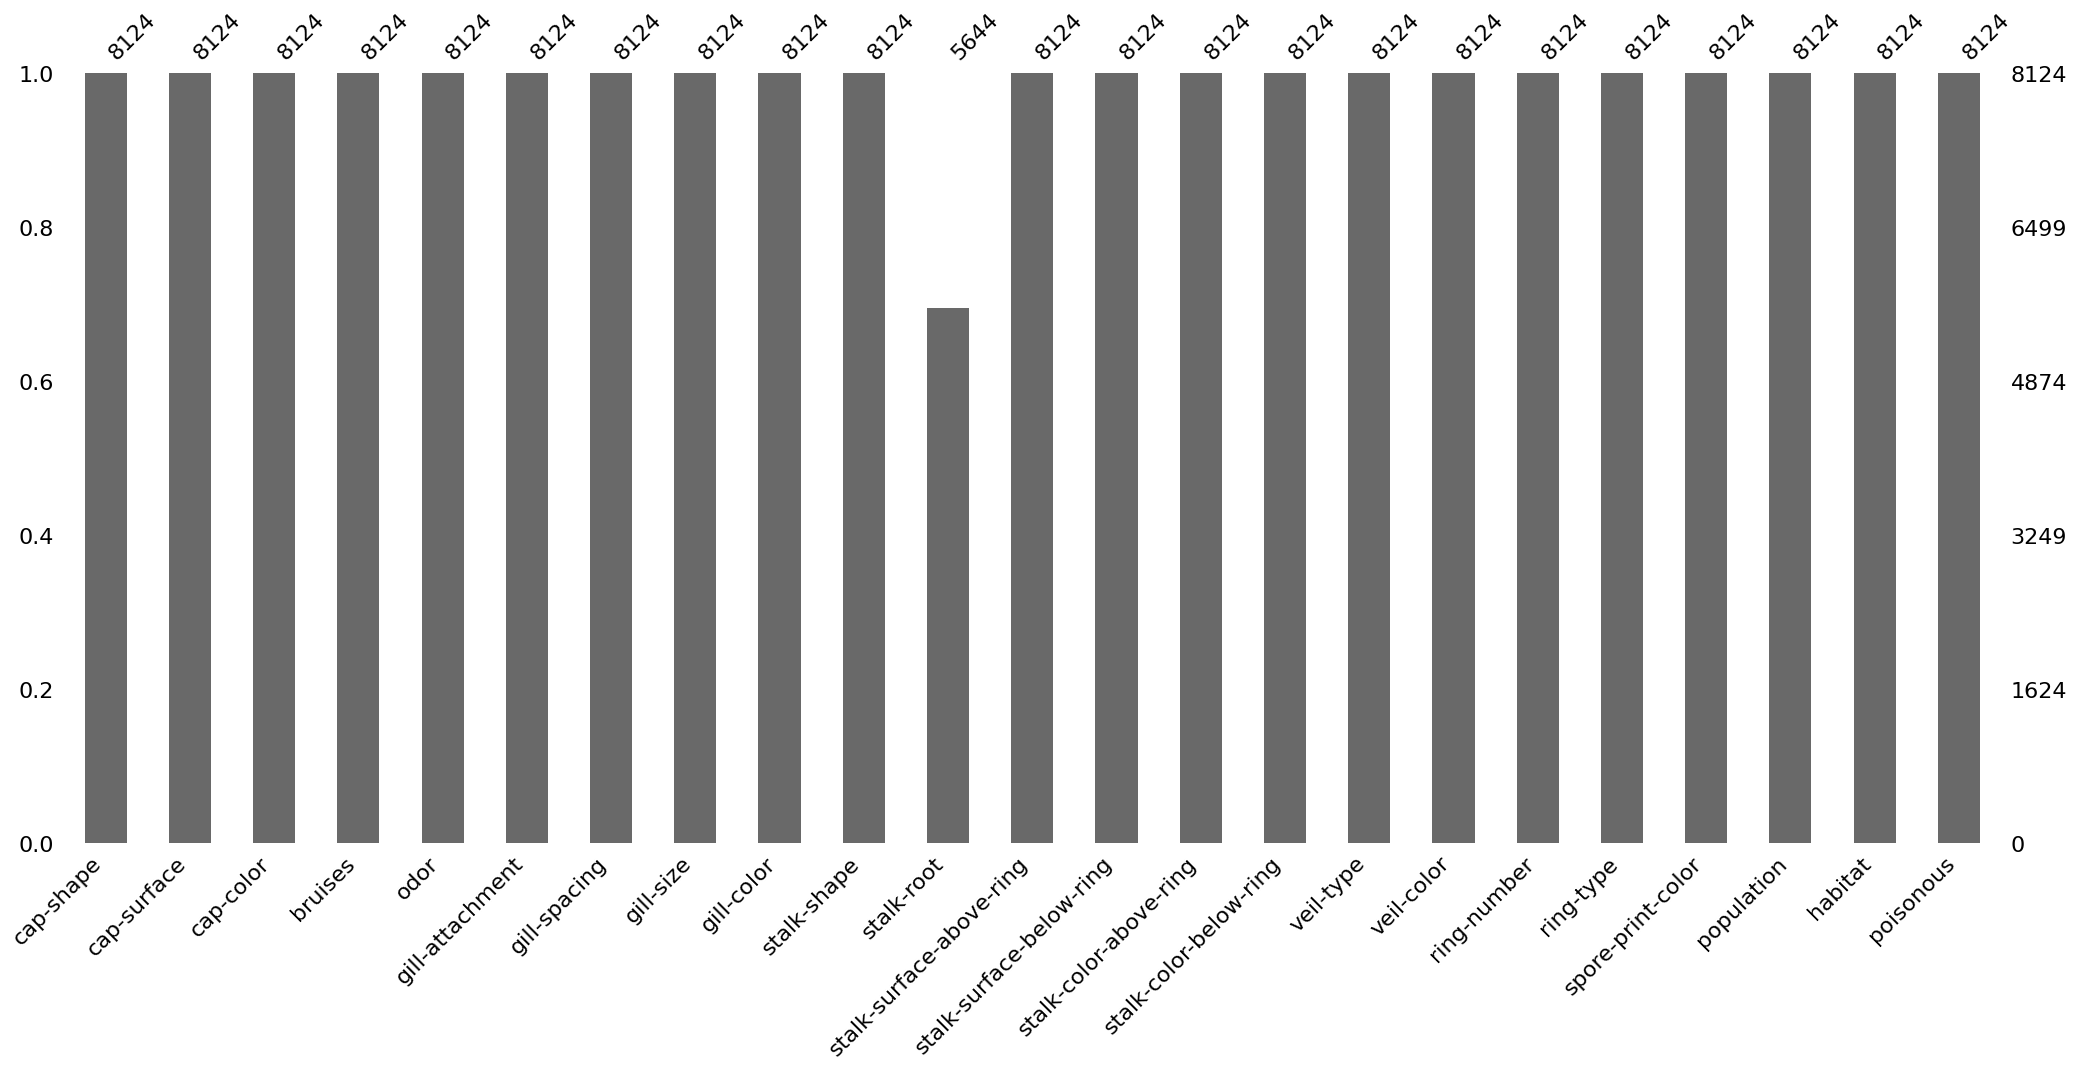

In [70]:
#missing value visualization
import missingno as msno
msno.bar(df)

In [71]:
#replacing "NaN" of stalk-root column with "most frequented" class
df['stalk-root'].fillna(df['stalk-root'].mode()[0], inplace=True)

In [72]:
#any duplicate row exist?
df.duplicated().sum()

0

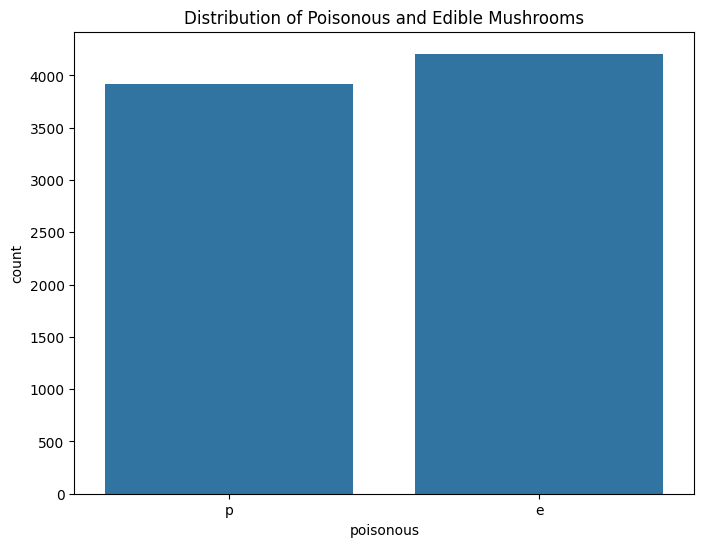

In [74]:
#Distribution of Poisonous and Edible Mushrooms
plt.figure(figsize=(8, 6))
sns.countplot(x='poisonous', data=df)
plt.title('Distribution of Poisonous and Edible Mushrooms')
plt.show()


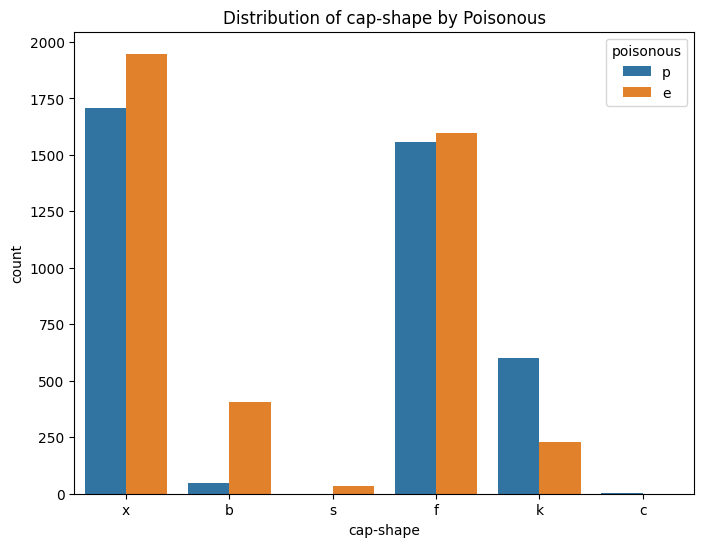

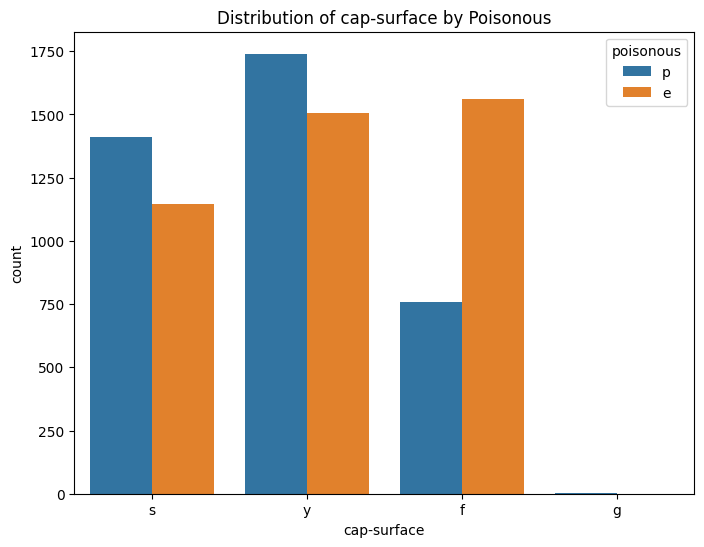

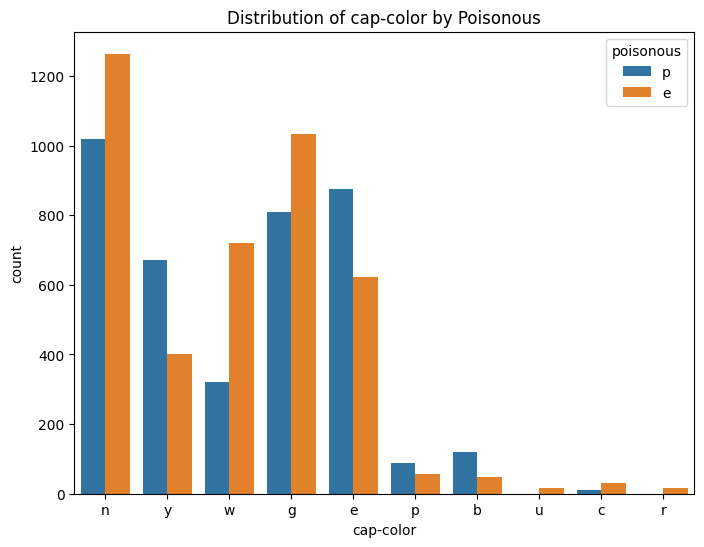

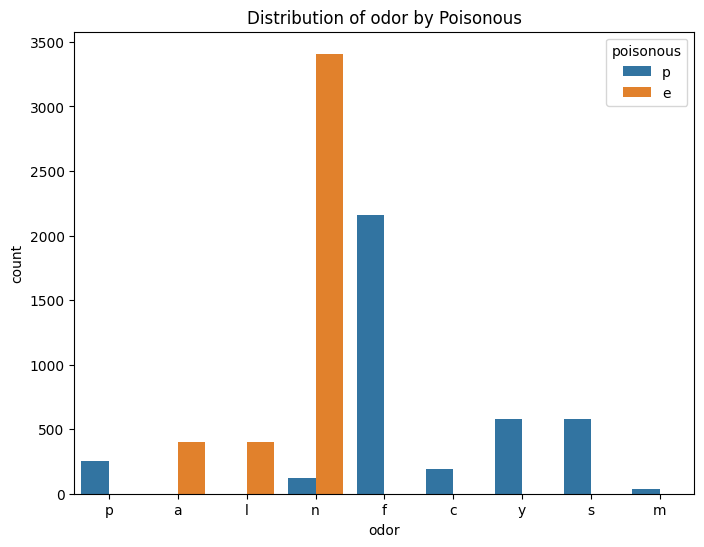

In [75]:
#Distribution of {feature} by Poisonous
features = ['cap-shape', 'cap-surface', 'cap-color', 'odor']
for feature in features:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=feature, hue='poisonous', data=df)
  plt.title(f'Distribution of {feature} by Poisonous')
  plt.show()



In [76]:
#value counts
for col in df.columns:
    print(df[col].value_counts())
    print(f"count:{len(df[col].value_counts())}")
    print("====================")

cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64
count:6
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64
count:4
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64
count:10
bruises
f    4748
t    3376
Name: count, dtype: int64
count:2
odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64
count:9
gill-attachment
f    7914
a     210
Name: count, dtype: int64
count:2
gill-spacing
c    6812
w    1312
Name: count, dtype: int64
count:2
gill-size
b    5612
n    2512
Name: count, dtype: int64
count:2
gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64
count:12
stalk-shape
t    4608
e    3516
Name: count, dtype: int64
count:2
stalk-root
b    6256
e    1120
c     556


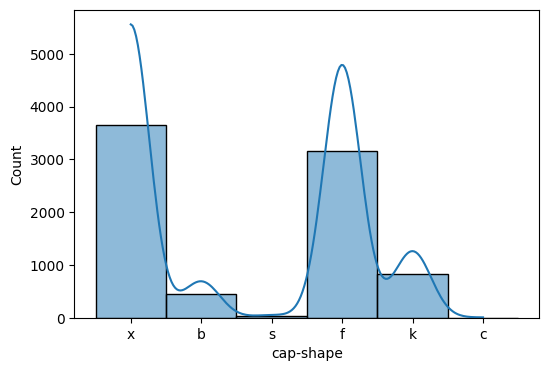

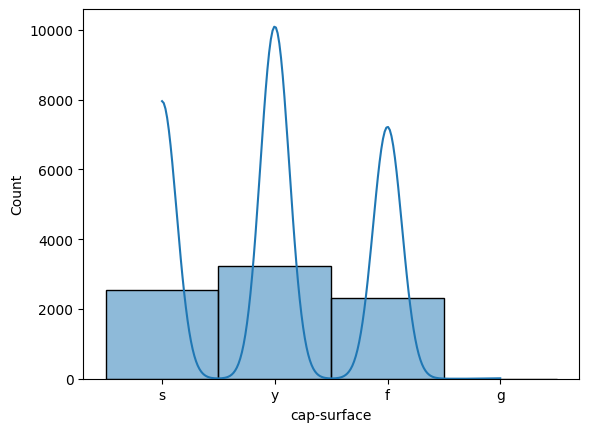

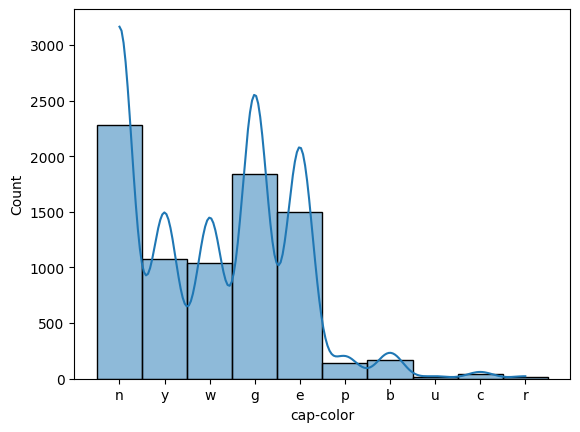

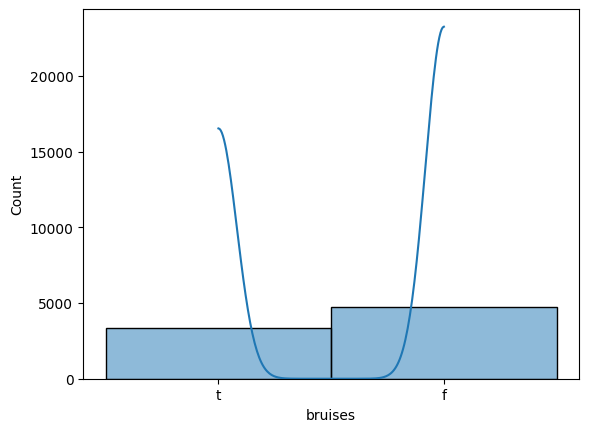

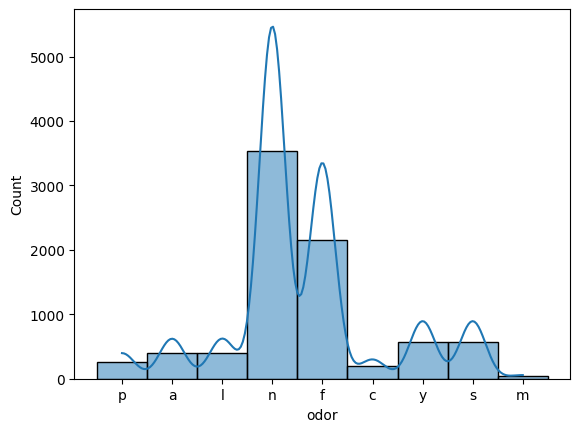

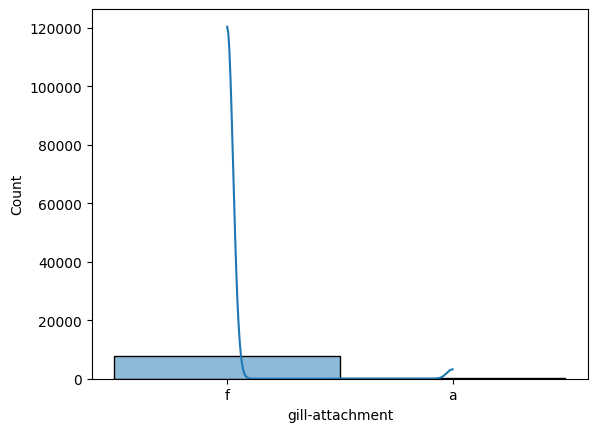

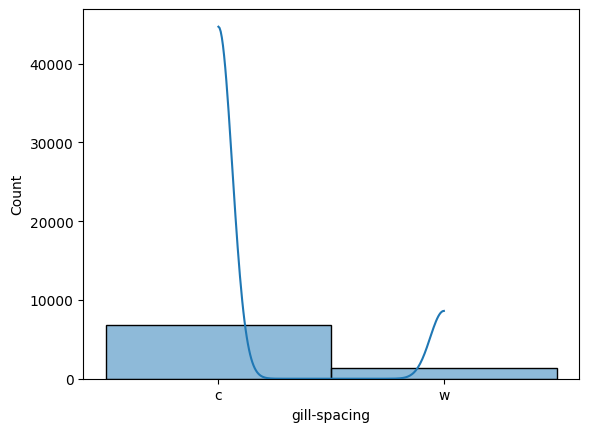

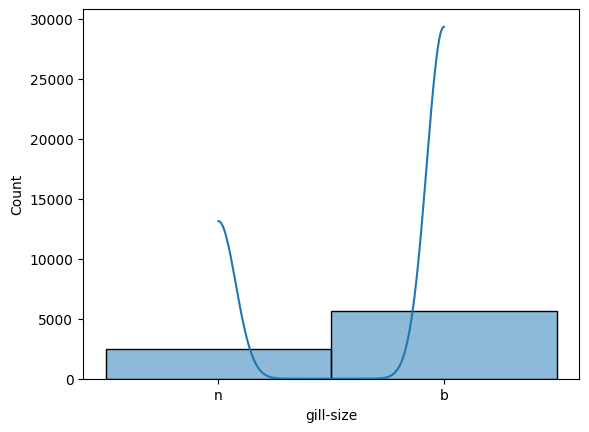

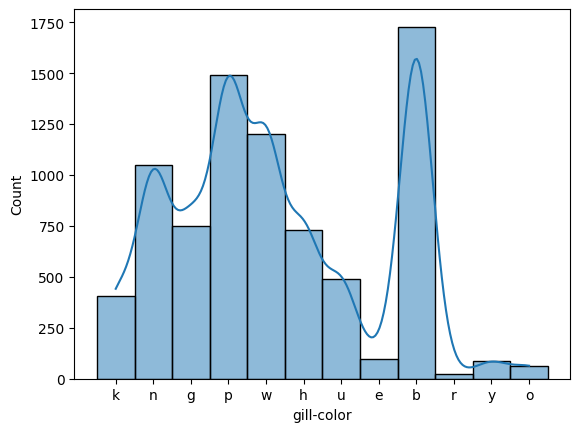

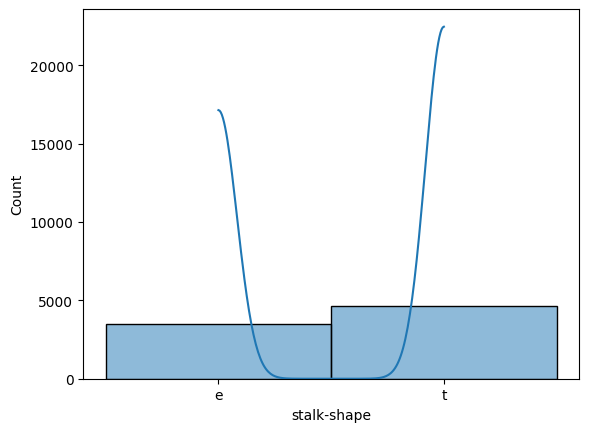

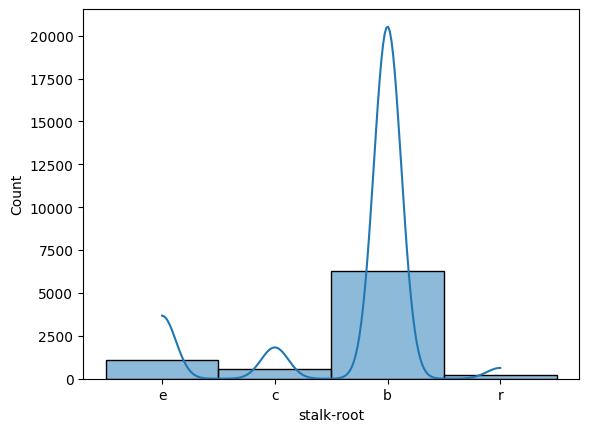

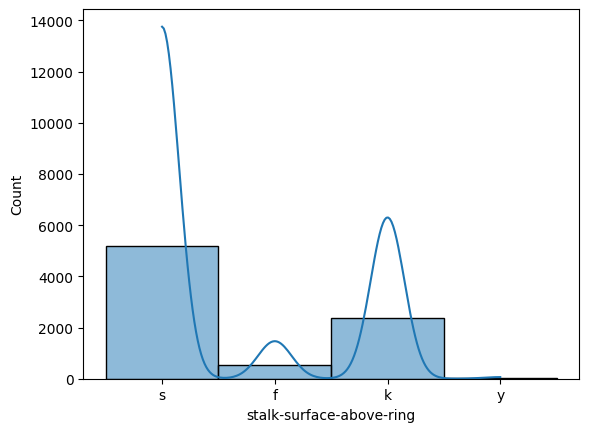

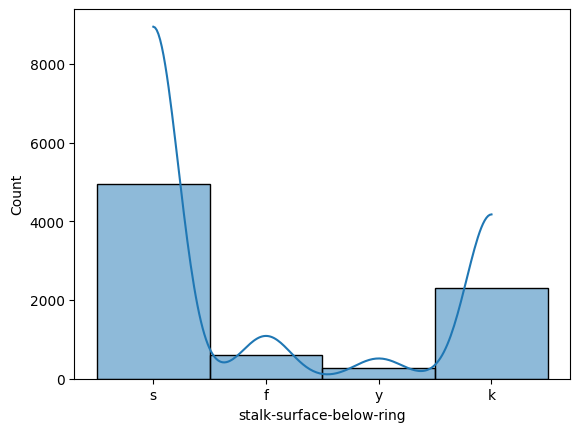

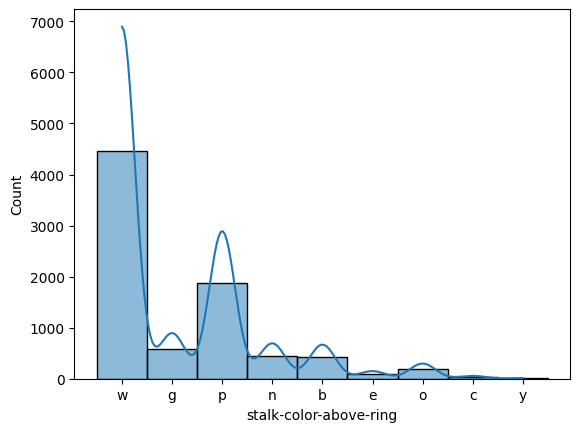

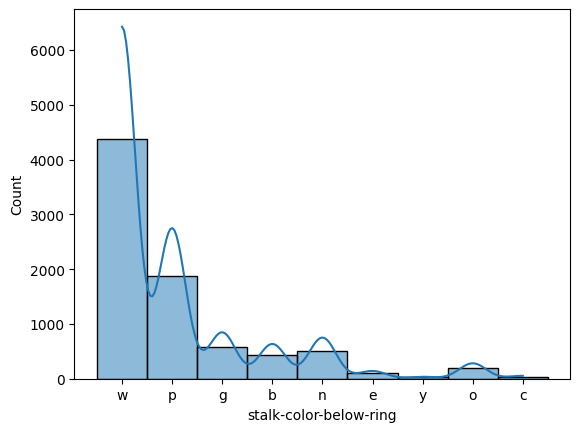

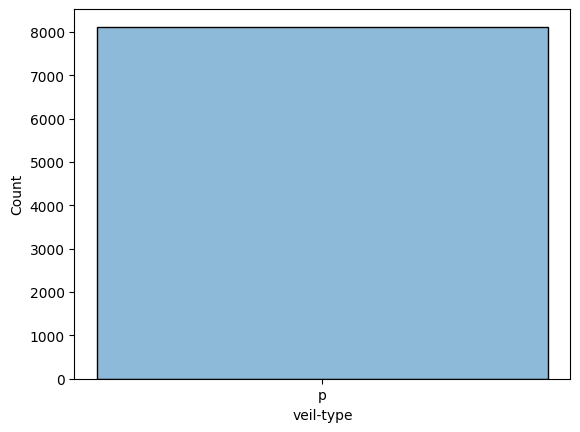

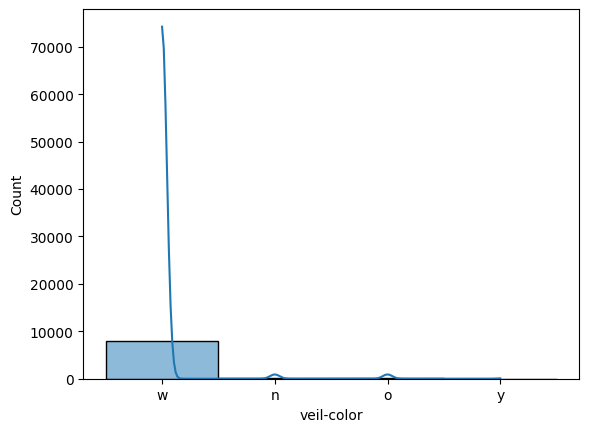

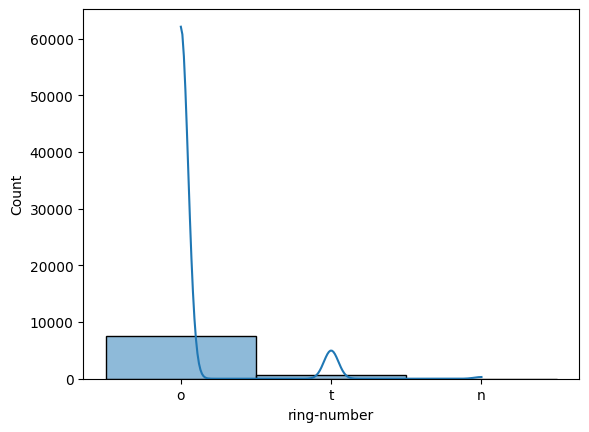

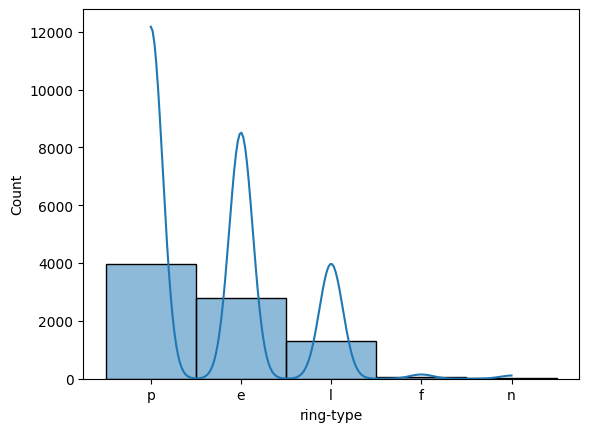

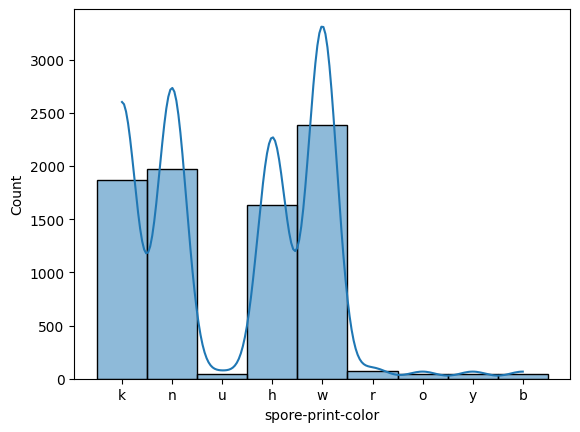

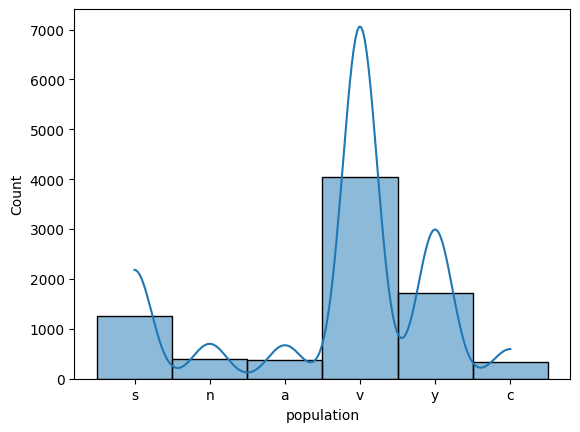

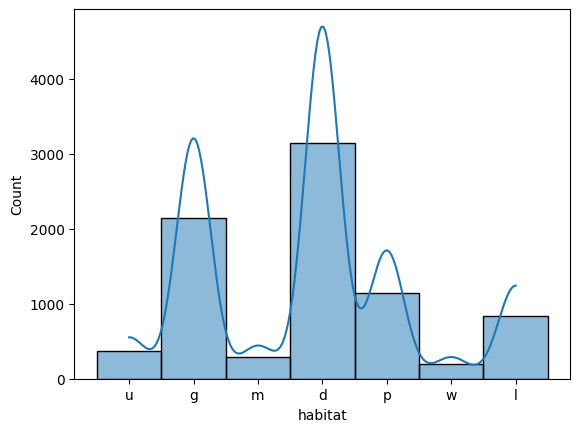

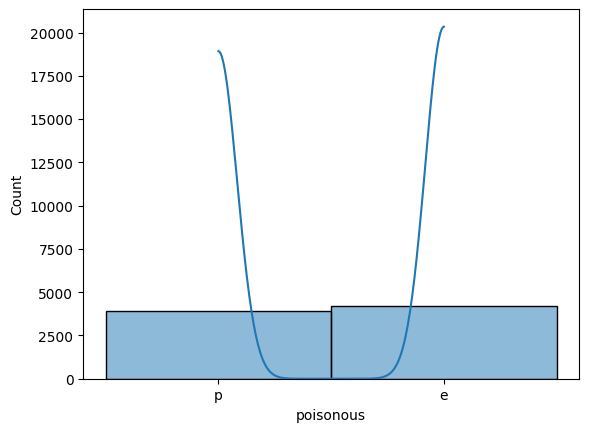

In [77]:
#distribution plot
plt.figure(figsize=(6,4))

for col in df.columns:
    sns.histplot(data=df,x=col,kde=True)
    print("\n")
    plt.show()

In [78]:

X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [79]:
#splitting
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30, random_state=42)

In [81]:
X_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5921,x,s,b,t,f,f,c,b,h,t,...,f,w,w,p,w,o,p,h,v,u
1073,x,f,g,t,n,f,c,b,p,t,...,s,p,w,p,w,o,p,k,y,d
3710,x,f,g,f,f,f,c,b,p,e,...,k,n,b,p,w,o,l,h,v,d
144,x,y,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,k,n,g
5469,x,y,n,f,y,f,c,n,b,t,...,k,w,p,p,w,o,e,w,v,d


In [82]:

from sklearn import preprocessing

# Encode categorical features
label_encoders = {}

for column in X_train.columns:
    le = preprocessing.LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column])
    label_encoders[column] = le  # Store the encoder for future use

# Encode the target variable with a separate LabelEncoder
le_target =preprocessing.LabelEncoder()

y_train = le_target.fit_transform(y_train)
y_test = le_target.transform(y_test)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [84]:
X_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5921,5,2,0,1,2,1,0,0,3,1,...,0,7,7,0,2,1,4,1,4,5
1073,5,0,3,1,5,1,0,0,7,1,...,2,6,7,0,2,1,4,2,5,0
3710,5,0,3,0,2,1,0,0,7,0,...,1,4,0,0,2,1,2,1,4,0
144,5,3,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,2,2,1
5469,5,3,4,0,8,1,0,1,0,1,...,1,7,6,0,2,1,0,7,4,0


In [86]:
X_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1971,2,0,4,0,5,1,1,0,3,1,...,0,7,7,0,2,1,0,3,3,1
6654,2,2,2,0,8,1,0,1,0,1,...,2,6,6,0,2,1,0,7,4,2
5606,5,3,4,0,2,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,2
3332,2,3,3,1,5,1,0,0,5,1,...,2,3,6,0,2,1,4,3,5,0
6988,2,2,2,0,7,1,0,1,0,1,...,2,6,6,0,2,1,0,7,4,2


In [87]:
y_train

array([1, 0, 1, ..., 0, 1, 0])

In [88]:
y_test

array([0, 1, 1, ..., 1, 0, 0])

In [89]:
label_encoders

{'cap-shape': LabelEncoder(),
 'cap-surface': LabelEncoder(),
 'cap-color': LabelEncoder(),
 'bruises': LabelEncoder(),
 'odor': LabelEncoder(),
 'gill-attachment': LabelEncoder(),
 'gill-spacing': LabelEncoder(),
 'gill-size': LabelEncoder(),
 'gill-color': LabelEncoder(),
 'stalk-shape': LabelEncoder(),
 'stalk-root': LabelEncoder(),
 'stalk-surface-above-ring': LabelEncoder(),
 'stalk-surface-below-ring': LabelEncoder(),
 'stalk-color-above-ring': LabelEncoder(),
 'stalk-color-below-ring': LabelEncoder(),
 'veil-type': LabelEncoder(),
 'veil-color': LabelEncoder(),
 'ring-number': LabelEncoder(),
 'ring-type': LabelEncoder(),
 'spore-print-color': LabelEncoder(),
 'population': LabelEncoder(),
 'habitat': LabelEncoder()}

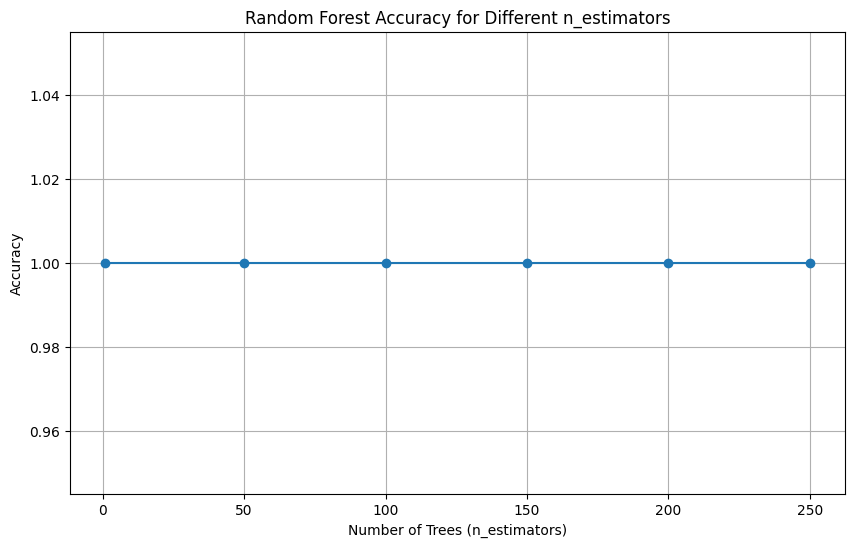

In [90]:
#3.   Evaluate and compare Random Forest tree accuracy for the folowing n_estimators values 1,50,100,150,200, and 250.

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

n_estimators_list = [1, 50, 100, 150, 200, 250]
rf_accuracies = []

for n_estimators in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    rf_accuracies.append(accuracy)

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, rf_accuracies, marker='o')
plt.title('Random Forest Accuracy for Different n_estimators')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


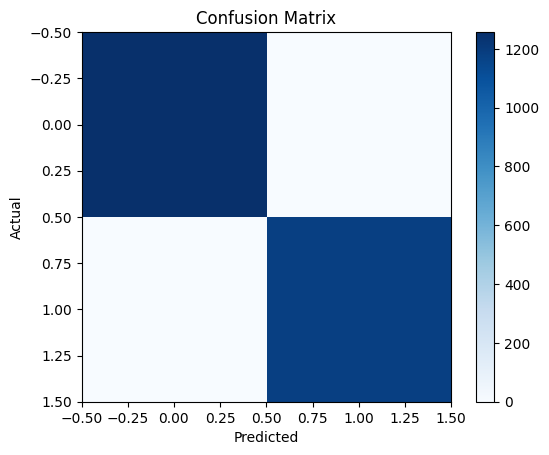

rf:              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


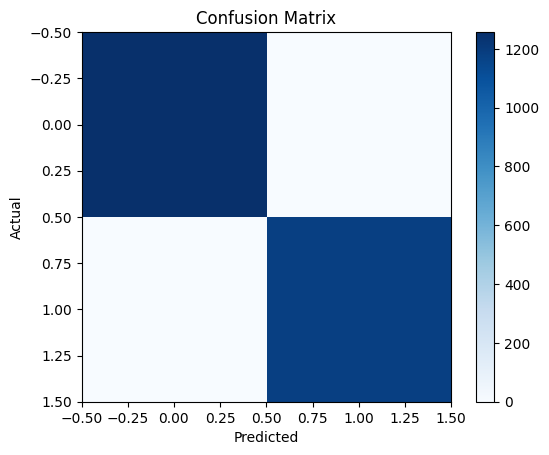

dt:              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Random Forest Accuracy: 1.0
Decision Tree Accuracy: 1.0


In [105]:
#4.Evaluate and compare performance of Random Forest and Decision Tree.

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Random Forest with the best n_estimators
best_n_estimators = n_estimators_list[rf_accuracies.index(max(rf_accuracies))]
best_rf = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
best_rf.fit(X_train, y_train)
rf_y_pred = best_rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
prec = precision_score(y_test, rf_y_pred, average='macro')
rec = recall_score(y_test, rf_y_pred, average='macro')
f1 = f1_score(y_test, rf_y_pred, average='macro')
# Print the results
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {f1:.2f}")
# Plot the confusion matrix
cm = confusion_matrix(y_test, rf_y_pred)
plt.imshow(cm, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()
# Print the classification report
print(f'rf:{classification_report(y_test, rf_y_pred)}')
print("="*50)


# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
prec = precision_score(y_test, dt_y_pred, average='macro')
rec = recall_score(y_test, dt_y_pred, average='macro')
f1 = f1_score(y_test, dt_y_pred, average='macro')
# Print the results
print(f"Accuracy: {dt_accuracy:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {f1:.2f}")
# Plot the confusion matrix
cm = confusion_matrix(y_test, dt_y_pred)
plt.imshow(cm, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()
# Print the classification report
print(f'dt:{classification_report(y_test, dt_y_pred)}')
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Decision Tree Accuracy: {dt_accuracy}")


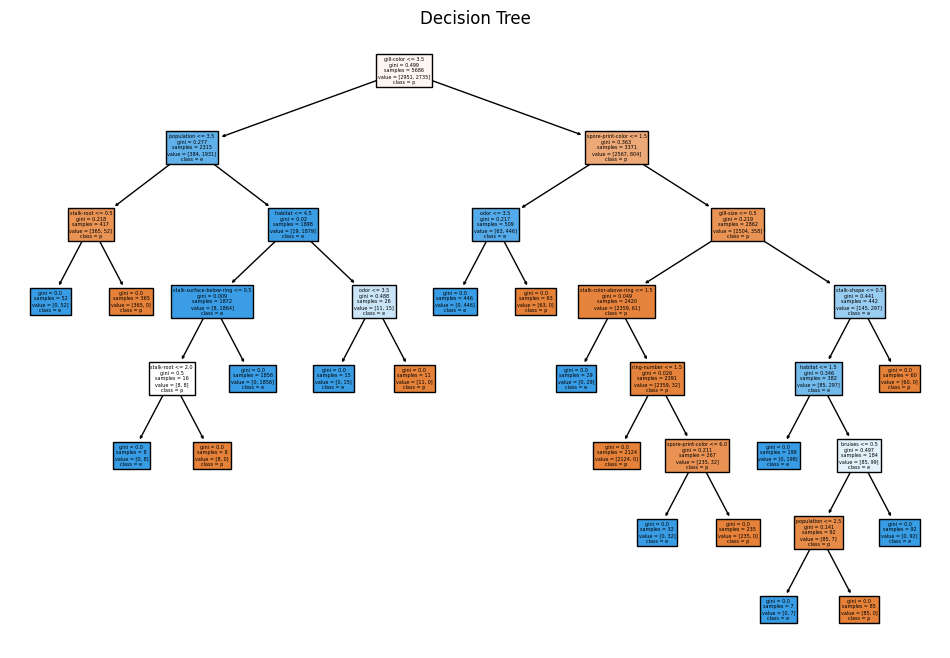

In [99]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=X.columns, class_names=['p','e'], filled=True)
plt.title('Decision Tree')
plt.show()